In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/My Drive/quora_insincere-data/dataset/dataset.csv')

In [ ]:
len("The domain of Natural Language Processing covers various tasks, such as classification, text generation, and language model. The data processed using word embeddings, or vectorizers, is then trained using Machine Learning and Deep Learning algorithms. In order to observe the tradeoff between both these types of algorithms, with respect to data available, accuracy obtained and other factors, a binary classification is undertaken to distinguish between insincere and regular questions on Quora. A dataset called Quora Insincere Questions Classification was used to train various machine learning and deep learning models. A Bidirectional-Long Short Term Network (LSTM) was trained, with the text processed using Global Vectors for Word Representation (GloVe). Machine Learning algorithms such as Extreme Gradient Boosting classifier, Gaussian Naive Bayes, and Support Vector Classifier (SVC), by using the TF-IDF vectorizer to process the text.".split())

134

In [ ]:
df.head()

,question_text,target
0,how did quebec nationalists see their province...,0
1,do you have an adopted dog how would you encou...,0
2,why does velocity affect time does velocity af...,0
3,how did otto von guericke used the magdeburg h...,0
4,is gaza slowly becoming auschwitz dachau or tr...,0


In [ ]:
df["target"].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


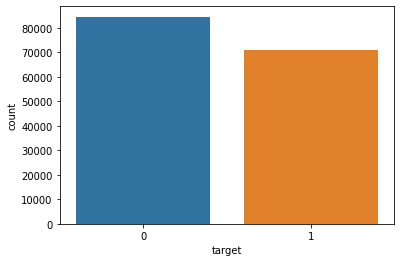

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df["target"])

In [ ]:
def cloud(text, title, size = (10,7)):
    wordcloud = WordCloud(width=800, height=400,
                          collocations=False
                         ).generate(" ".join(text))
    
    fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    # plt.title(title, fontsize=20,color='w')
    plt.tight_layout(pad=0)
    plt.show()

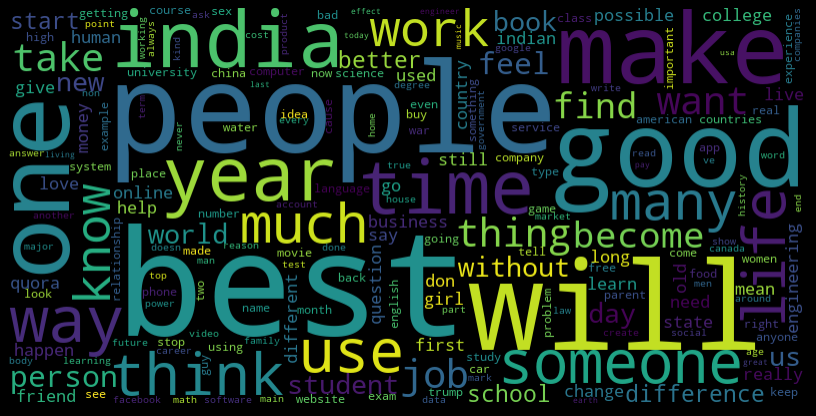

In [ ]:
from wordcloud import WordCloud 
cloud(df["question_text"].loc[df["target"]==0], "Sincere Questions words")

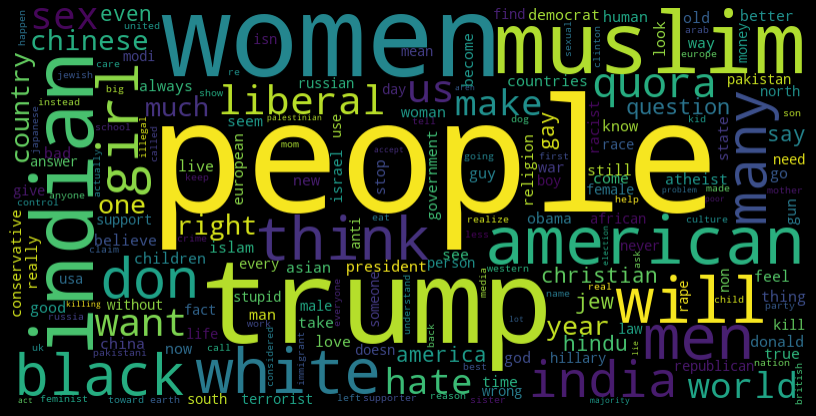

In [ ]:
cloud(df["question_text"].loc[df["target"]==1], "Insincere Questions Words")

In [ ]:
import random
for _ in range(10):
  print(df["question_text"][random.randint(0, df.shape[0])])

What is the difference between Continental Drift and Plate Tectonics Theory?
Which Roman emperor is probably not as bad as popular history thinks?
How do you check password Strength in JavaScript?
Will pretty girls still look pretty when they get older?
What are your favourite word derivations?
How do you find an intrablock estimate for a treatment in a balanced incomplete block design?
Is lateral entry possible in NIFT bftech?
Does the world seem slow to people who are used to high speed (ie; fighter pilots)?
If racism ended, how long would it take for someone to ruin it?
Should Indians really keep Tamil Nadu?


In [ ]:
import string
def cleanHtml(x):
  temp = ""
  x = x.lower()
  for i in x:
    if i in string.punctuation:
      temp += ""
    else:
      temp += i
      
  return " ".join(temp.split())

In [ ]:
df["question_text"] = df["question_text"].apply(lambda x: cleanHtml(x))

In [ ]:
import random
for _ in range(10):
  print(df["question_text"][random.randint(0, df.shape[0])])

based on the story link below is rosa maria ortega being treated fairly by the state of texas should she go to prison then be deported
is there anyone who knows the fifa 18 coins site fifa18 coins club
how do you write an absent note for work
what is mean by lmage and who are you to answer that question
why is jee required even for software engineering where computer knowledge is required more than pcm
how do i apply for lost pan card
what was your first year like as a draftsman
i am a gay chinese man in america with an uncontrollable and exclusive attraction towards caucasian men and suffer from constant rejections is it possible to unlearn this mindset to live a better life
would a refocus on the nuclear family have an impact on poverty
which authors writers often write have written about india s foreign policy


In [ ]:
MAX_VOCAB = 0
word2idx = {}
from tqdm import tqdm
for i in tqdm(df["question_text"]):
  sent = i.split()
  for word in sent:
    if word not in word2idx:
      word2idx[word] = MAX_VOCAB
      MAX_VOCAB += 1

100%|██████████| 1306122/1306122 [00:05<00:00, 243351.02it/s]


In [ ]:
  df["question_text"][indexes[0]]

'can i convert montra helicon d to a mountain bike by just changing the tyres'

In [ ]:
# df.drop(indexes, inplace=True)
df.drop(["qid", "index"], axis=1, inplace=True)
# df.reset_index(inplace=True)
df.shape

(1154858, 2)

In [ ]:
indexes = []
for i in range(90000, df.shape[0]):
  if df["target"][i] == 0:
    indexes.append(i)

In [ ]:
abs(len(indexes) - 1083939)

84496

In [ ]:
df.drop(indexes, inplace=True)

In [ ]:
df["target"].value_counts()
df.to_csv('/content/drive/My Drive/quora_insincere-data/dataset/dataset.csv', index=False)

In [ ]:
word2idx = {}
indexes = []

target = []
from tqdm import tqdm
for k, i in tqdm(enumerate(df["question_text"])):
  include = False
  sent = i.split()
  for word in sent:
    embedding_vector = word2Vec.get(word)
    if embedding_vector is not None:
      include = True
    else:
      include = False
      break
  if not include:
    indexes.append(k)
    target.append(df["target"][k])


0it [00:00, ?it/s]
2010it [00:00, 20095.28it/s]
4578it [00:00, 21495.97it/s]
7646it [00:00, 23616.39it/s]
11327it [00:00, 26461.31it/s]
14857it [00:00, 28605.56it/s]
19205it [00:00, 31876.85it/s]
23402it [00:00, 34355.07it/s]
27967it [00:00, 37107.62it/s]
33256it [00:00, 40755.26it/s]
39706it [00:01, 45815.05it/s]
45909it [00:01, 49711.35it/s]
51290it [00:01, 50869.36it/s]
56614it [00:01, 51432.91it/s]
61925it [00:01, 51589.17it/s]
67241it [00:01, 52047.03it/s]
72747it [00:01, 52915.70it/s]
78101it [00:01, 51216.24it/s]
83824it [00:01, 52882.48it/s]
89706it [00:01, 54532.80it/s]
95209it [00:02, 54593.88it/s]
101159it [00:02, 55976.21it/s]
107837it [00:02, 58825.99it/s]
114142it [00:02, 60018.02it/s]
120734it [00:02, 61669.07it/s]
126947it [00:02, 61251.06it/s]
133254it [00:02, 61785.17it/s]
139854it [00:02, 62984.57it/s]
146411it [00:02, 63735.32it/s]
152961it [00:02, 64254.58it/s]
159519it [00:03, 64645.34it/s]
165994it [00:03, 64071.70it/s]
172410it [00:03, 63042.92it/s]
179112it [0

In [ ]:
MAX_VOCAB

204833

In [ ]:
word2Vec = {}
with open('/content/drive/My Drive/Copy of glove.6B.300d.txt') as f:
  for line in f:
    line = line.rstrip().split()
    word = line[0]
    wordVector = line[1:]
    if wordVector is not None:
      word2Vec[word] = wordVector

In [ ]:
embedding_matrix = np.zeros((MAX_VOCAB, 300))
out = []
for word, i in word2idx.items():
  if i < MAX_VOCAB:
    embedding_vector = word2Vec.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
    else:
      out.append(word)

In [ ]:
len(out)

0

In [ ]:
print(out)

['montra', 'triund', 'dofs', 'calead', 'isovolumetric', 'equation…', 'tepelene', 'udacity', 'nanodegree', 'oppostie', 'cpss', 'pabt', '4afsb', 'anizara', 'olx', 'fortnite', 'i’m', 'powerbank', '170000', '1500mph', 'megabites', 'basetball', 'redmi', 'falsly', 'voilent', 'diffrent', 'beleifs', 'savegely', 'meetic', 'daca', 'ohmagawd', '9gag', 'performix', 'gulenist', 'venuas', 'trump’s', 'pakkstani', 'biotypes', '5dcv', '230acv', '10r', 'blavk', 'strenghts', 'what’s', 'celibrity', 'ecomonic', 'kyber', '17′', 'topik', 'mongodump', 'mongorestore', 'ingredio', 'lrdi', 'woodmaster', 'xrp', 'species…', 'airticket', 'imucet', 'ɾ̃', 'nɖ', 'nɾ', 's6e7', 'perfecty', 'stuter', 'copanies', 'examinaton', 'elecric', 'finix', '888…', '999…', 'addisons', 'recomend', 'wbjee', 'don’t', 'colege', 'ramk', 'purches', 'it’s', '28777', 'ilustrator', 'epecially', 'aadhar', 'bandhup', 'phasma', 'padmaavat', 'whatis', 'articleship', 'sydney’s', 'cleanshot', 'newsx', 'swagatham', 'tempature', 'sqrt', 'limewater',

In [ ]:
contractions = {
"ain’t": "am not",
"aren’t": "are not",
"can’t": "cannot",
"can’t’ve": "cannot have",
"'cause": "because",
"could’ve": "could have",
"couldn’t": "could not",
"couldn't've": "could not have",
"didn’t": "did not",
"doesn’t": "does not",
"don’t": "do not",
"hadn’t": "had not",
"hadn’t’ve": "had not have",
"hasn’t": "has not",
"haven’t": "have not",
"he’d": "he had",
"he’d’ve": "he would have",
"he’ll": "he will",
"he’ll’ve": "he will have",
"he’s": "he is",
"how’d": "how did",
"how’d’y": "how do you",
"how’ll": "how will",
"how’s": "how is",
"i’d": "I had",
"i’d’ve": "I would have",
"i’ll": "I will",
"i’ll’ve": "I will have",
"i’m": "I am",
"i’ve": "I have",
"isn’t": "is not",
"it’d": "it had",
"it’d’ve": "it would have",
"it’ll": "it will",
"it’ll’ve": "it will have",
"it’s": "it is",
"let’s": "let us",
"ma’am": "madam",
"mayn’t": "may not",
"might’ve": "might have",
"mightn’t": "might not",
"mightn’t’ve": "might not have",
"must’ve": "must have",
"mustn’t": "must not",
"mustn’t’ve": "must not have",
"needn’t": "need not",
"needn’t’ve": "need not have",
"o’clock": "of the clock",
"oughtn’t": "ought not",
"oughtn’t’ve": "ought not have",
"shan’t": "shall not",
"sha’n’t": "shall not",
"shan’t’ve": "shall not have",
"she’d": "she had",
"she’d’ve": "she would have",
"she’ll": "she will",
"she’ll’ve": "she will have",
"she’s": "she is",
"should’ve": "should have",
"shouldn’t": "should not",
"shouldn’t've": "should not have",
"so’ve": "so have",
"so’s": "so is",
"that’d": "that had",
"that’d’ve": "that would have",
"that’s": "that is",
"there’d": "there would",
"there’d’ve": "there would have",
"there’s": "there is",
"they’d": "they would",
"they’d’ve": "they would have",
"they’ll": "they will",
"they’ll’ve": "they will have",
"they’re": "they are",
"they’ve": "they have",
"to’ve": "to have",
"wasn’t": "was not",
"we’d": "we would",
"we’d’ve": "we would have",
"we’ll": "we will",
"we’ll’ve": "we will have",
"we’re": "we are",
"we’ve": "we have",
"weren’t": "were not",
"what’ll": "what will",
"what’ll’ve": "what will have",
"what’re": "what are",
"what’s": "what is",
"what’ve": "what have",
"when’s": "when is",
"when’ve": "when have",
"where’d": "where did",
"where’s": "where is",
"where’ve": "where have",
"who’ll": "who will",
"who’ll’ve": "who will have",
"who’s": "who is",
"who’ve": "who have",
"why’s": "why is",
"why’ve": "why have",
"will’ve": "will have",
"won’t": "will not",
"won’t’ve": "will not have",
"would’ve": "would have",
"wouldn’t": "would not",
"wouldn’t’ve": "would not have",
"y’all": "you all",
"y’all’d": "you all would",
"y’all’d’ve": "you all would have",
"y’all’re": "you all are",
"y’all’ve": "you all have",
"you’d": "you would",
"you’d’ve": "you would have",
"you’ll": "you will",
"you’ll’ve": "you will have",
"you’re": "you are",
"you’ve": "you have"
}

In [ ]:
import string
def cleanHtml(x):
  temp = ""
  x = x.lower()
  for i in x:
    if i in string.punctuation:
      temp += ""
    else:
      temp += i
      
  temp = " ".join(temp.split())
  for word in temp.split():
    if word.lower() in contractions:
        temp = temp.replace(word, contractions[word.lower()])
  return temp

In [ ]:
df["question_text"] = df["question_text"].apply(lambda x: cleanHtml(x))

In [ ]:
df.shape

(155415, 2)

In [ ]:
# drop_index = []
# target = []
# for i in tqdm(range(df.shape[0])):

#   text = df["question_text"][i].split()
#   for word in text:
#     if word in out:
#       # print(f'word is {word} and is at index {i} \\\ and the sent4ence is {df["question_text"][i]}')
#       target.append(df["target"][i])
#       drop_index.append(i)

In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, Input
from keras.layers import LSTM, Bidirectional, Conv1D, GlobalMaxPool1D, Embedding, Dense, MaxPooling1D, GlobalMaxPooling1D
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/quora_insincere-data/dataset/dataset.csv')
df.head()

,question_text,target
0,how did quebec nationalists see their province...,0
1,do you have an adopted dog how would you encou...,0
2,why does velocity affect time does velocity af...,0
3,how did otto von guericke used the magdeburg h...,0
4,is gaza slowly becoming auschwitz dachau or tr...,0


In [ ]:
# word2Vec = {}
# with open('/content/drive/My Drive/Copy of glove.6B.300d.txt') as f:
#   for line in f:
#     line = line.rstrip().split()
#     word = line[0]
#     wordVector = line[1:]
#     if wordVector is not None:
#       word2Vec[word] = wordVector

In [ ]:
max_seq_len = max(len(s) for s in df["question_text"].str.split())

In [ ]:
print(max_seq_len)

67


In [ ]:
X = df["question_text"]
y = df["target"]

In [ ]:
MAX_VOCAB = 0
word2idx = {}
from tqdm import tqdm
for i in tqdm(df["question_text"]):
  sent = i.split()
  for word in sent:
    if word not in word2idx:
      word2idx[word] = MAX_VOCAB
      MAX_VOCAB += 1

100%|██████████| 155415/155415 [00:00<00:00, 313584.02it/s]


In [ ]:
MAX_VOCAB

48239

In [ ]:
print(word2idx)

{'how': 0, 'did': 1, 'quebec': 2, 'nationalists': 3, 'see': 4, 'their': 5, 'province': 6, 'as': 7, 'a': 8, 'nation': 9, 'in': 10, 'the': 11, '1960s': 12, 'do': 13, 'you': 14, 'have': 15, 'an': 16, 'adopted': 17, 'dog': 18, 'would': 19, 'encourage': 20, 'people': 21, 'to': 22, 'adopt': 23, 'and': 24, 'not': 25, 'shop': 26, 'why': 27, 'does': 28, 'velocity': 29, 'affect': 30, 'time': 31, 'space': 32, 'geometry': 33, 'otto': 34, 'von': 35, 'guericke': 36, 'used': 37, 'magdeburg': 38, 'hemispheres': 39, 'is': 40, 'gaza': 41, 'slowly': 42, 'becoming': 43, 'auschwitz': 44, 'dachau': 45, 'or': 46, 'treblinka': 47, 'for': 48, 'palestinians': 49, 'quora': 50, 'automatically': 51, 'ban': 52, 'conservative': 53, 'opinions': 54, 'when': 55, 'reported': 56, 'but': 57, 'same': 58, 'liberal': 59, 'views': 60, 'it': 61, 'crazy': 62, 'if': 63, 'i': 64, 'wash': 65, 'wipe': 66, 'my': 67, 'groceries': 68, 'off': 69, 'germs': 70, 'are': 71, 'everywhere': 72, 'there': 73, 'such': 74, 'thing': 75, 'dressing'

In [ ]:
# print(word2Vec['quebec'])

In [ ]:
tokenizer = Tokenizer(MAX_VOCAB)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

In [ ]:
X[0]

[13, 49, 5221, 2540, 163, 35, 6202, 34, 4, 557, 5, 1, 8016]

In [ ]:
word2idx = tokenizer.word_counts

In [ ]:
print(word2idx)

OrderedDict([('how', 27727), ('did', 6206), ('quebec', 31), ('nationalists', 82), ('see', 1502), ('their', 9261), ('province', 24), ('as', 9530), ('a', 49893), ('nation', 424), ('in', 42677), ('the', 87362), ('1960s', 16), ('do', 38488), ('you', 22053), ('have', 13883), ('an', 7783), ('adopted', 46), ('dog', 639), ('would', 7650), ('encourage', 92), ('people', 14651), ('to', 56757), ('adopt', 63), ('and', 39822), ('not', 10266), ('shop', 108), ('why', 41165), ('does', 10665), ('velocity', 69), ('affect', 346), ('time', 2622), ('space', 381), ('geometry', 22), ('otto', 4), ('von', 14), ('guericke', 1), ('used', 1182), ('magdeburg', 1), ('hemispheres', 1), ('is', 52140), ('gaza', 47), ('slowly', 45), ('becoming', 391), ('auschwitz', 8), ('dachau', 2), ('or', 12292), ('treblinka', 1), ('for', 22855), ('palestinians', 365), ('quora', 3696), ('automatically', 73), ('ban', 307), ('conservative', 372), ('opinions', 138), ('when', 9875), ('reported', 56), ('but', 4456), ('same', 1544), ('liber

In [ ]:
len(tokenizer.word_counts)

48239

In [ ]:
number_words = MAX_VOCAB + 1
DIMENSIONS = 300
# embedding_matrix = np.zeros((number_words, DIMENSIONS))
# for word, i in word2idx.items():
#   if i < MAX_VOCAB:
#     embedding_vector = word2Vec.get(word)
#     if embedding_vector is not None:
#       embedding_matrix[i] = embedding_vector
#     else:
#       print("out of vocab ", word)

In [ ]:
# np.save('/content/drive/My Drive/quora_insincere-data/embedding_matrix', embedding_matrix)
embedding_matrix = np.load('/content/drive/My Drive/quora_insincere-data/embedding_matrix.npy')

In [ ]:
# print(embedding_matrix[1502])

In [ ]:
X = pad_sequences(X, max_seq_len, padding='post')

In [ ]:
X[0]

array([  13,   49, 5221, 2540,  163,   35, 6202,   34,    4,  557,    5,
          1, 8016,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

In [ ]:
LSTM_UNITS = 512
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
embedding_layer = Embedding(number_words, DIMENSIONS, trainable=True, weights=[embedding_matrix])
embedding_layer_input = Input(shape=(max_seq_len,))
embedding_layer_x = embedding_layer(embedding_layer_input)

In [ ]:
lstm = Bidirectional(LSTM(LSTM_UNITS, return_sequences=True))
lstm_ouputs = lstm(embedding_layer_x)
after_lstm = GlobalMaxPool1D()(lstm_ouputs)

In [ ]:
dense_layer = Dense(1, activation='sigmoid')
output_category = dense_layer(after_lstm)

In [ ]:
model = Model(embedding_layer_input, output_category)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 67)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 67, 300)           14472000  
_________________________________________________________________
bidirectional (Bidirectional (None, 67, 1024)          3330048   
_________________________________________________________________
global_max_pooling1d (Global (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1025      
Total params: 17,803,073
Trainable params: 17,803,073
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
3109/3109 [==============================] - 501s 161ms/step - loss: 0.3089 - accuracy: 0.8745 - val_loss: 0.2918 - val_accuracy: 0.8848
Epoch 2/5
3109/3109 [==============================] - 500s 161ms/step - loss: 0.2229 - accuracy: 0.9143 - val_loss: 0.2746 - val_accuracy: 0.8905
Epoch 3/5
3109/3109 [==============================] - 502s 161ms/step - loss: 0.1642 - accuracy: 0.9392 - val_loss: 0.3008 - val_accuracy: 0.8866
Epoch 4/5
3109/3109 [==============================] - 491s 158ms/step - loss: 0.0994 - accuracy: 0.9649 - val_loss: 0.4094 - val_accuracy: 0.8775
Epoch 5/5
3109/3109 [==============================] - 488s 157ms/step - loss: 0.0470 - accuracy: 0.9840 - val_loss: 0.5673 - val_accuracy: 0.8704


In [ ]:
y_pred = model.predict(X_test)
for i in range(0, y_pred.shape[0]):
  if y_pred[i] > 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

In [ ]:
from sklearn.metrics import classification_report

target_names = ['Sincere', 'In Sincere']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Sincere       0.89      0.87      0.88     16782
  In Sincere       0.85      0.88      0.87     14301

    accuracy                           0.87     31083
   macro avg       0.87      0.87      0.87     31083
weighted avg       0.87      0.87      0.87     31083



In [ ]:
embedding_cnn_input = Input(shape=(max_seq_len,))
embedding_cnn_layer = Embedding(number_words, DIMENSIONS, weights=[embedding_matrix], trainable=True)
embedding_x = embedding_cnn_layer(embedding_cnn_input)

In [ ]:
x = Conv1D(128, 3, activation='relu')(embedding_x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

In [ ]:
model2 = Model(embedding_cnn_input, output)
model2.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 67)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 67, 300)           14472000  
_________________________________________________________________
conv1d (Conv1D)              (None, 65, 128)           115328    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 21, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 19, 128)           49280     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)              

In [ ]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model2.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.2)

Epoch 1/5
3109/3109 [==============================] - 427s 137ms/step - loss: 0.3223 - accuracy: 0.8658 - val_loss: 0.2794 - val_accuracy: 0.8897
Epoch 2/5
3109/3109 [==============================] - 417s 134ms/step - loss: 0.2310 - accuracy: 0.9115 - val_loss: 0.2845 - val_accuracy: 0.8869
Epoch 3/5
3109/3109 [==============================] - 418s 134ms/step - loss: 0.1766 - accuracy: 0.9337 - val_loss: 0.3038 - val_accuracy: 0.8857
Epoch 4/5
3109/3109 [==============================] - 421s 135ms/step - loss: 0.1164 - accuracy: 0.9571 - val_loss: 0.3979 - val_accuracy: 0.8790
Epoch 5/5
3109/3109 [==============================] - 420s 135ms/step - loss: 0.0669 - accuracy: 0.9756 - val_loss: 0.4390 - val_accuracy: 0.8697


In [ ]:
y_pred = model2.predict(X_test)
for i in range(0, y_pred.shape[0]):
  if y_pred[i] > 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

In [ ]:
from sklearn.metrics import classification_report

target_names = ['Sincere', 'In Sincere']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Sincere       0.91      0.85      0.88     16782
  In Sincere       0.84      0.90      0.87     14301

    accuracy                           0.87     31083
   macro avg       0.87      0.88      0.87     31083
weighted avg       0.88      0.87      0.87     31083

